# Программирование для всех (основы работы в Python)

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text)

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме просмотра исходного кода страницы (`view-source` через *Ctrl+U* в Google Chrome).

In [7]:
soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [ ]:
print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [8]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/explainatorium
/theme/bookshelf
/theme/nobelprize
/theme/Courses
/theme/coronavirus-history
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/explainatorium
/theme/bookshelf
/theme/nobelprize
/theme/Courses
/theme/coronavirus-history
https://nplus1.ru/blog/2020/10/12/darwins-dangerous-idea
https://nplus1.ru/blog/2020/10/12/darwins-dangerous-idea
https://nplus1.ru/blog/2020/10/09/marriage-and-extramarital-life
https://nplus1.ru/blog/2020/10/08/the-science-of-staying-well
https://nplus1.ru/blog/2020/10/07/fight-for-freedom-in-the-don-region
https://nplus1.ru/blog/2020/10/01/october-2020-observations
https://nplus1.ru/blog/2020/09/30/in-search-of-constantinople
https://nplus1.ru/blog/2020/09/28/the-hungry-steppe
https://nplus1.ru/blog/2020/09/24/nobel-prediction
https://nplus1.ru/blog/2020/09/18/formations-of-the-secular
https://nplus1.ru/blog/2020/10/13/the-diet-myth


Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [9]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2020/10/14/silver-electronics',
 '/news/2020/10/14/wolves-attachment',
 '/news/2020/10/14/room-temperature-superconductivity',
 '/news/2020/10/14/airborne-c-and-c',
 '/news/2020/10/14/same-sex-kids',
 '/news/2020/10/14/kawasaki',
 '/news/2020/10/14/physical-health-longevity-and-communication-freque',
 '/news/2020/10/14/reproductive-right-and-babies',
 '/news/2020/10/14/UVultrafastphotography',
 '/news/2020/10/14/stormbreaker',
 '/news/2020/10/13/shepard-lunar',
 '/news/2020/10/13/apple-october',
 '/news/2020/10/13/Meniscus-guided-organic-tft',
 '/news/2020/10/13/proteus-anguinus',
 '/news/2020/10/13/mice-gender',
 '/news/2020/10/13/pluto-methane',
 '/news/2020/10/13/pheucticus-ludovicianus',
 '/news/2020/10/13/crew-1-november',
 '/news/2020/10/13/mineral',
 '/news/2020/10/09/paper-picturers',
 '/news/2020/10/12/top-quark-nucleus-nucleus',
 '/news/2020/10/12/memristorspectra',
 '/news/2020/10/08/strange-b-meson-asymmetry',
 '/news/2020/10/14/UVultrafastphotography',
 '/news/2020

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [10]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2020/10/14/silver-electronics',
 'https://nplus1.ru/news/2020/10/14/wolves-attachment',
 'https://nplus1.ru/news/2020/10/14/room-temperature-superconductivity',
 'https://nplus1.ru/news/2020/10/14/airborne-c-and-c',
 'https://nplus1.ru/news/2020/10/14/same-sex-kids',
 'https://nplus1.ru/news/2020/10/14/kawasaki',
 'https://nplus1.ru/news/2020/10/14/physical-health-longevity-and-communication-freque',
 'https://nplus1.ru/news/2020/10/14/reproductive-right-and-babies',
 'https://nplus1.ru/news/2020/10/14/UVultrafastphotography',
 'https://nplus1.ru/news/2020/10/14/stormbreaker',
 'https://nplus1.ru/news/2020/10/13/shepard-lunar',
 'https://nplus1.ru/news/2020/10/13/apple-october',
 'https://nplus1.ru/news/2020/10/13/Meniscus-guided-organic-tft',
 'https://nplus1.ru/news/2020/10/13/proteus-anguinus',
 'https://nplus1.ru/news/2020/10/13/mice-gender',
 'https://nplus1.ru/news/2020/10/13/pluto-methane',
 'https://nplus1.ru/news/2020/10/13/pheucticus-ludovicianus',
 '

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [11]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text)

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [12]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="2020-10-14" itemprop="datePublished"/>,
 <meta content="Елизавета Ивтушок" name="mediator_author"/>,
 <meta content="Если волка оставить на поводке у незнакомца, он начнет скулить и рваться к человеку, которого знает" name="description"/>,
 <meta content="Елизавета Ивтушок" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Волки привязались к дрессировщикам" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2020/10/14/6021f53daf9ca5eebcaf77e0454f3541.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2020/10/14/wolves-attachment" property="og:url"/>,
 <meta content="Если волка оставить на поводке у незнакомца, он начнет скулить и рваться к

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [13]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Елизавета Ивтушок" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [14]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Елизавета Ивтушок" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [15]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Елизавета Ивтушок'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [16]:
author = soup0.find_all('meta', {'name' : 'author'})[0]['content']
author

'Елизавета Ивтушок'

Аналогичным образом извлечем дату, заголовок и описание.

In [17]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0]['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0]['content']
description = soup0.find_all('meta', {'name' : 'description'})[0]['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [18]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="zoology" href="/rubric/zoology">Зоология</a>
 </p>, <p class="table">
 <a href="/news/2020/10/14">
 <time content="2020-10-14" data-unix="1602689962" itemprop="datePublished">
 <span>18:39</span>
 <span>14 Окт. 2020</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/2.6">
 <span>Сложность</span>
 <span class="difficult-value">2.6</span>
 </a>
 </p>, <p class="title"></p>, <p class="credits">Paula Pérez Fraga</p>, <p>Венгерские ученые обнаружили у взрослых волков, выращенных в неволе, стойкую привязанность к своим дрессировщикам. Для этого они проследили за поведением 11 волков, которых оставляли гулять либо со знакомым, либо с незнакомым человеком: на поводке у незнакомца волк чаще рвался в сторону своего дрессировщика, испытывал сильный стресс и меньше исследовал окружающее пространство. Те же результаты ученые получили и для домашних собак. Привязанность к человеку, по-видимому, исходит из привязанности волка к членам его стаи: ско

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [19]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="zoology" href="/rubric/zoology">Зоология</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [20]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Зоология']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [21]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">2.6</span>]

И выберем оттуда текст.

In [22]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'2.6'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [23]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [24]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [25]:
final_text = ' '.join(text)
final_text

'Венгерские ученые обнаружили у взрослых волков, выращенных в неволе, стойкую привязанность к своим дрессировщикам. Для этого они проследили за поведением 11 волков, которых оставляли гулять либо со знакомым, либо с незнакомым человеком: на поводке у незнакомца волк чаще рвался в сторону своего дрессировщика, испытывал сильный стресс и меньше исследовал окружающее пространство. Те же результаты ученые получили и для домашних собак. Привязанность к человеку, по-видимому, исходит из привязанности волка к членам его стаи: скорее всего,\xa0именно она способствовала успешному одомашниванию на ранних этапах, пишут ученые\xa0в журнале Scientific Reports. На уровне поведения привязанность принято рассматривать как определенную форму предпочтения: так, ее формирование подразумевает, что объект привязанности незаменим, его отсутствие приводит к стрессу, а присутствие, наоборот, позволяет свободно исследовать окружающую среду и даже чувствовать себя защищенным. Исходя из этих параметров, привязан

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [26]:
final_text = final_text.replace('\n', ' ')

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [27]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, если будем обсуждать встраивание в браузер с Selenium). Приступим.

In [28]:
from time import sleep

In [29]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [30]:
news[0]

('https://nplus1.ru/news/2020/10/14/silver-electronics',
 '2020-10-14',
 'Григорий Копиев',
 'Это позволяет создавать на коже устойчивые датчики',
 'Серебряные электроды спеклись на коже при комнатной температуре',
 'Китайские и\xa0американские ученые разработали метод нанесения и\xa0спекания тонких серебряных электродов прямо на\xa0коже при комнатной температуре. Им\xa0удалось достичь этого благодаря вспомогательному слою, который увеличивает зернограничную диффузию и\xa0тем самым снижает температуру спекания серебряных наночастиц. После нанесения электродов к\xa0ним можно подключить считывающую электронику и\xa0использовать в\xa0качестве носимого устройства, рассказывают авторы статьи в\xa0ACS Applied Materials &\xa0Interfaces. Уже не\xa0первый год ученые и\xa0исследователи экспериментируют с\xa0электронными устройствами, тем или иным образом наносимыми прямо на\xa0кожу человека. Это позволяет создавать на\xa0коже проводящие (а\xa0зачастую и\xa0весьма красивые) узоры, используемые дл

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [31]:
import pandas as pd

In [32]:
df = pd.DataFrame(news)

In [33]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2020/10/14/silver-elect...,2020-10-14,Григорий Копиев,Это позволяет создавать на коже устойчивые дат...,Серебряные электроды спеклись на коже при комн...,Китайские и американские ученые разработали ме...,[Материалы],3.7
1,https://nplus1.ru/news/2020/10/14/wolves-attac...,2020-10-14,Елизавета Ивтушок,"Если волка оставить на поводке у незнакомца, о...",Волки привязались к дрессировщикам,Венгерские ученые обнаружили у взрослых волков...,[Зоология],2.6


Переименуем столбцы в базе.

In [34]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [35]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2020/10/14/silver-elect...,2020-10-14,Григорий Копиев,Это позволяет создавать на коже устойчивые дат...,Серебряные электроды спеклись на коже при комн...,Китайские и американские ученые разработали ме...,[Материалы],3.7
1,https://nplus1.ru/news/2020/10/14/wolves-attac...,2020-10-14,Елизавета Ивтушок,"Если волка оставить на поводке у незнакомца, о...",Волки привязались к дрессировщикам,Венгерские ученые обнаружили у взрослых волков...,[Зоология],2.6


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [37]:
df['diffc'] = df['diffc'].astype(float)

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [38]:
df.diffc.describe()

count    27.000000
mean      3.666667
std       1.621490
min       1.300000
25%       2.450000
50%       3.400000
75%       5.100000
max       7.200000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

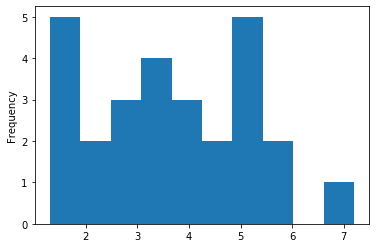

In [39]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [40]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [41]:
df.text[0]

'Китайские и\xa0американские ученые разработали метод нанесения и\xa0спекания тонких серебряных электродов прямо на\xa0коже при комнатной температуре. Им\xa0удалось достичь этого благодаря вспомогательному слою, который увеличивает зернограничную диффузию и\xa0тем самым снижает температуру спекания серебряных наночастиц. После нанесения электродов к\xa0ним можно подключить считывающую электронику и\xa0использовать в\xa0качестве носимого устройства, рассказывают авторы статьи в\xa0ACS Applied Materials &\xa0Interfaces. Уже не\xa0первый год ученые и\xa0исследователи экспериментируют с\xa0электронными устройствами, тем или иным образом наносимыми прямо на\xa0кожу человека. Это позволяет создавать на\xa0коже проводящие (а\xa0зачастую и\xa0весьма красивые) узоры, используемые для передачи сигнала или в\xa0качестве сенсорных панелей. Первые подобные работы основывались на\xa0подложках, наклеиваемых на\xa0кожу, а\xa0в\xa0последнее время все чаще используется прямое нанесение с\xa0помощью 3D-п

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [42]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [43]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [44]:
df.clean_text[0]

'Китайские и американские ученые разработали метод нанесения и спекания тонких серебряных электродов прямо на коже при комнатной температуре. Им удалось достичь этого благодаря вспомогательному слою, который увеличивает зернограничную диффузию и тем самым снижает температуру спекания серебряных наночастиц. После нанесения электродов к ним можно подключить считывающую электронику и использовать в качестве носимого устройства, рассказывают авторы статьи в ACS Applied Materials & Interfaces. Уже не первый год ученые и исследователи экспериментируют с электронными устройствами, тем или иным образом наносимыми прямо на кожу человека. Это позволяет создавать на коже проводящие (а зачастую и весьма красивые) узоры, используемые для передачи сигнала или в качестве сенсорных панелей. Первые подобные работы основывались на подложках, наклеиваемых на кожу, а в последнее время все чаще используется прямое нанесение с помощью 3D-принтера. Изначально основная проблема с этим способом заключалась в т

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [45]:
df.to_excel('nplus-news.xlsx')